In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
housing = pd.read_csv(url)

In [2]:
features = housing[['longitude', 'latitude', 'median_income']]


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

clusters = kmeans.labels_


In [5]:
housing['cluster'] = clusters
housing[['longitude', 'latitude', 'median_income', 'cluster']].head()

,longitude,latitude,median_income,cluster
0,-122.23,37.88,8.3252,1
1,-122.22,37.86,8.3014,1
2,-122.24,37.85,7.2574,1
3,-122.25,37.85,5.6431,1
4,-122.25,37.85,3.8462,4


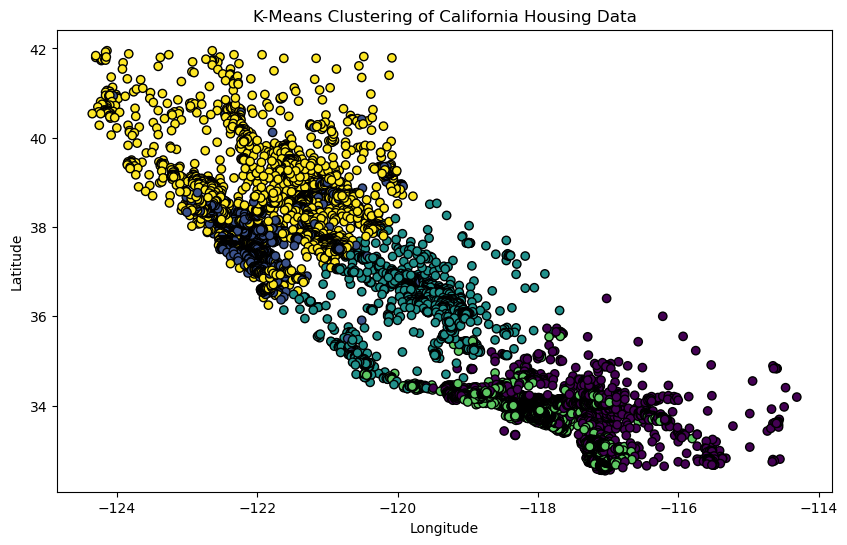

In [6]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Housing Data')
plt.show()

In [7]:
print(f'Inertia: {kmeans.inertia_}')


Inertia: 12632.865174008331


k=2, Silhouette Score=0.5482304452184799
k=3, Silhouette Score=0.5179721838532693
k=4, Silhouette Score=0.43517979770599646
k=5, Silhouette Score=0.4100830999013529
k=6, Silhouette Score=0.3984653534071962
k=7, Silhouette Score=0.37225184832846725
k=8, Silhouette Score=0.3666693541000338
k=9, Silhouette Score=0.34617328321860785
k=10, Silhouette Score=0.35372734784052684


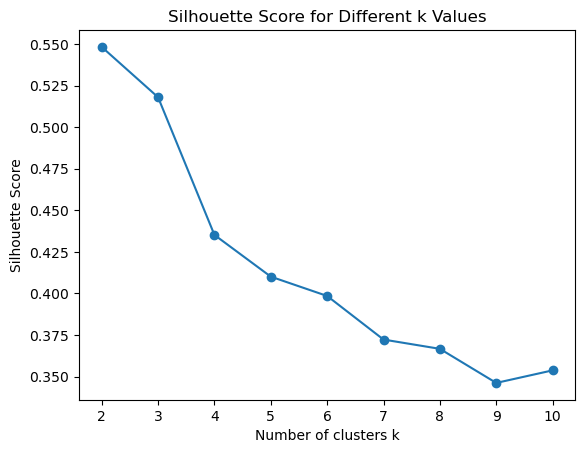

In [8]:
from sklearn.metrics import silhouette_score

# Function to run K-Means and calculate silhouette score
def find_optimal_clusters(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette = silhouette_score(data, labels)
        silhouette_scores.append(silhouette)
        print(f'k={k}, Silhouette Score={silhouette}')
    return silhouette_scores

# Run K-Means with k from 2 to 10
silhouette_scores = find_optimal_clusters(scaled_features, 10)

# Plot silhouette scores to find the optimal k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.show()


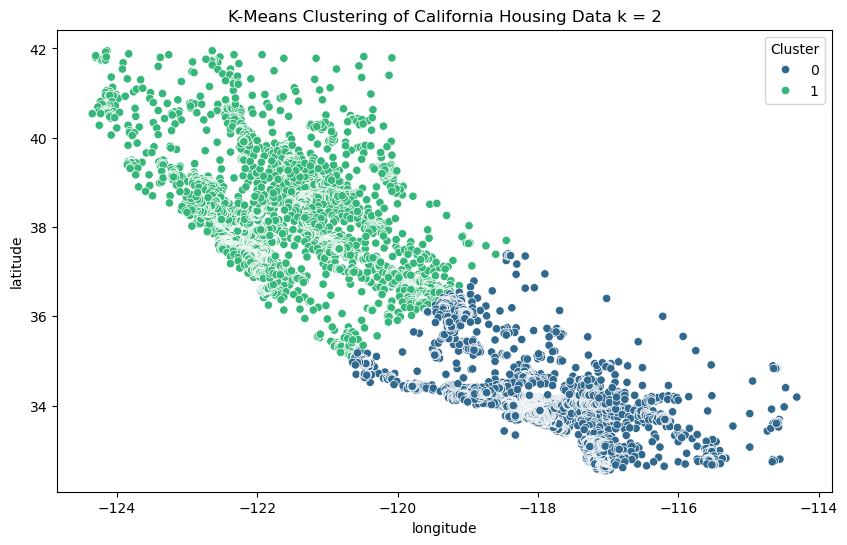

In [25]:
import seaborn as sns

# Apply K-Means with the optimal number of clusters (let's assume k=4 from silhouette analysis)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
housing['Cluster'] = kmeans.labels_

# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=housing, palette='viridis')
plt.title('K-Means Clustering of California Housing Data k = 2')
plt.show()


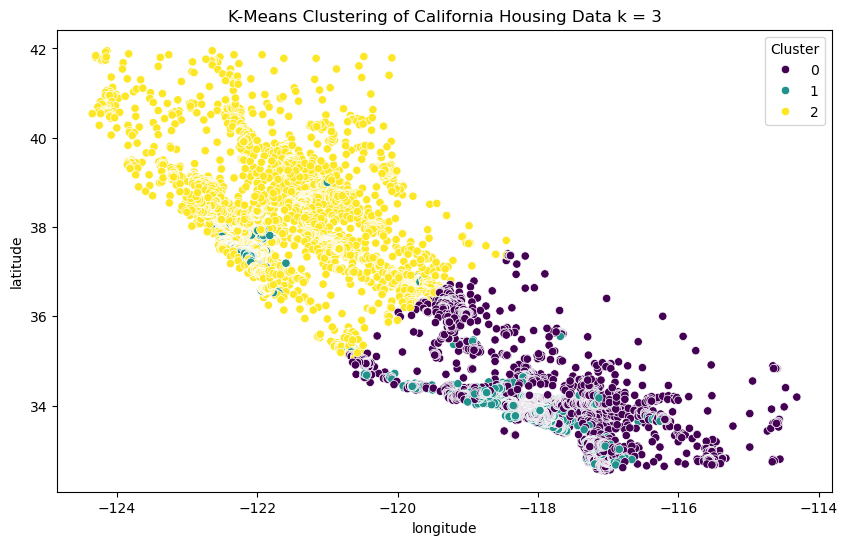

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
housing['Cluster'] = kmeans.labels_

# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=housing, palette='viridis')
plt.title('K-Means Clustering of California Housing Data k = 3')
plt.show()


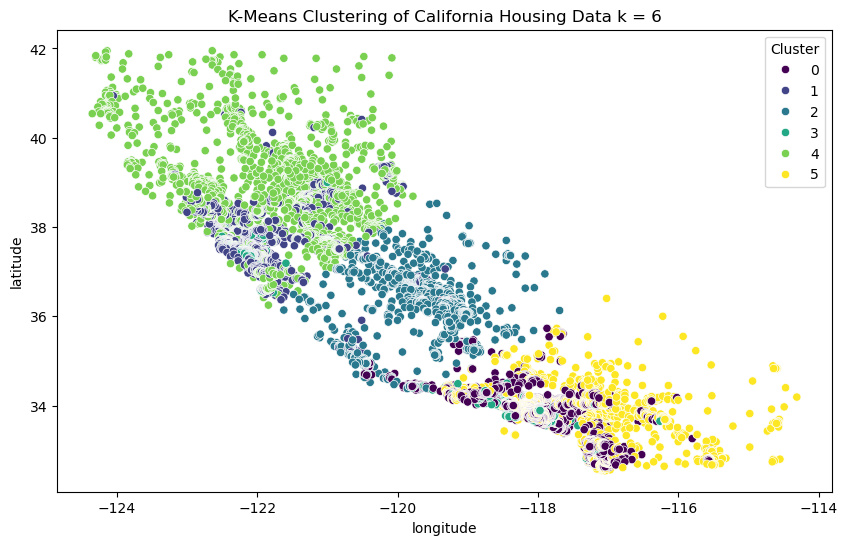

In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_features)
housing['Cluster'] = kmeans.labels_

# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=housing, palette='viridis')
plt.title('K-Means Clustering of California Housing Data k = 6')
plt.show()


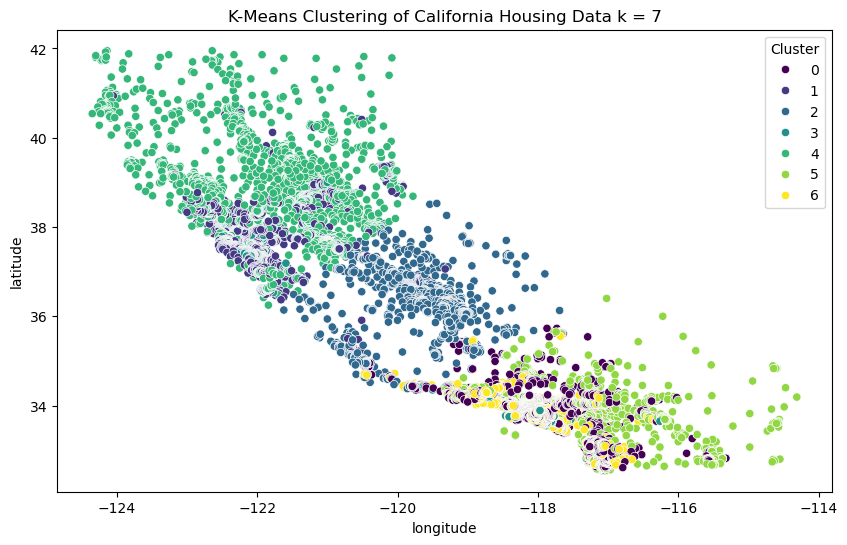

In [33]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(scaled_features)
housing['Cluster'] = kmeans.labels_

# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=housing, palette='viridis')
plt.title('K-Means Clustering of California Housing Data k = 7')
plt.show()
